In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [3]:
# Load Dataset 1
file_path_1 = '/content/drive/MyDrive/476 project/datasets/flight_data_0-1.csv'
df_01 = pd.read_csv(file_path_1)

# Print the first few rows of Dataset 1
print("Dataset 1 (flight_data_0-1.csv) Head:")
print(df_01.head())

Dataset 1 (flight_data_0-1.csv) Head:
                  AIRLINE ORIGIN DEST  ARR_DELAY  CRS_ELAPSED_TIME  AIR_TIME  \
0   United Air Lines Inc.    FLL  EWR        0.0             186.0     153.0   
1    Delta Air Lines Inc.    MSP  SEA        0.0             235.0     189.0   
2   United Air Lines Inc.    DEN  MSP        0.0             118.0      87.0   
3    Delta Air Lines Inc.    MSP  SFO        1.0             260.0     249.0   
4  American Airlines Inc.    DCA  BOS        0.0             109.0      58.0   

   DISTANCE  MONTH  DAY_OF_WEEK  DEP_HOUR  MONTHLY_DELAY_INDICATOR  \
0    1065.0      1            2        11                -0.626652   
1    1399.0     11            5        21                -0.908221   
2     680.0      7            4         9                 0.980383   
3    1589.0      3            0        16                -0.345450   
4     399.0      6            6        10                 1.000000   

   ROUTE_DELAY_INDICATOR  
0              -0.445906  
1     

In [4]:
# Load Dataset 2
file_path_2 = '/content/drive/MyDrive/476 project/datasets/flight_data_15+.csv'
df_15 = pd.read_csv(file_path_2)

# Print the first few rows of Dataset 2
print("Dataset 2 (flight_data_15+.csv) Head:")
print(df_15.head())

Dataset 2 (flight_data_15+.csv) Head:
                  AIRLINE ORIGIN DEST  ARR_DELAY  CRS_ELAPSED_TIME  AIR_TIME  \
0   United Air Lines Inc.    FLL  EWR        0.0             186.0     153.0   
1    Delta Air Lines Inc.    MSP  SEA        0.0             235.0     189.0   
2   United Air Lines Inc.    DEN  MSP        0.0             118.0      87.0   
3    Delta Air Lines Inc.    MSP  SFO       24.0             260.0     249.0   
4  American Airlines Inc.    DCA  BOS        0.0             109.0      58.0   

   DISTANCE  MONTH  DAY_OF_WEEK  DEP_HOUR  MONTHLY_DELAY_INDICATOR  \
0    1065.0      1            2        11                -0.626652   
1    1399.0     11            5        21                -0.908221   
2     680.0      7            4         9                 0.980383   
3    1589.0      3            0        16                -0.345450   
4     399.0      6            6        10                 1.000000   

   ROUTE_DELAY_INDICATOR  
0              -0.445906  
1     

In [5]:
# Define categorical columns
categorical_cols = ['AIRLINE', 'ORIGIN', 'DEST']

# Dataset 1
X_01 = df_01.drop(columns=['ARR_DELAY'])  # Features
y_01 = df_01['ARR_DELAY']                # Target

# Dataset 2
X_15 = df_15.drop(columns=['ARR_DELAY'])  # Features
y_15 = df_15['ARR_DELAY']                 # Target

# Apply Ordinal Encoding to both datasets
encoder = OrdinalEncoder()
X_01[categorical_cols] = encoder.fit_transform(X_01[categorical_cols])
X_15[categorical_cols] = encoder.fit_transform(X_15[categorical_cols])

# Split data for Dataset 1
X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(X_01, y_01, test_size=0.2, random_state=42)

# Split data for Dataset 2
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=42)

Best Test MSE for Dataset 1: 0.1450 (with 91 estimators)


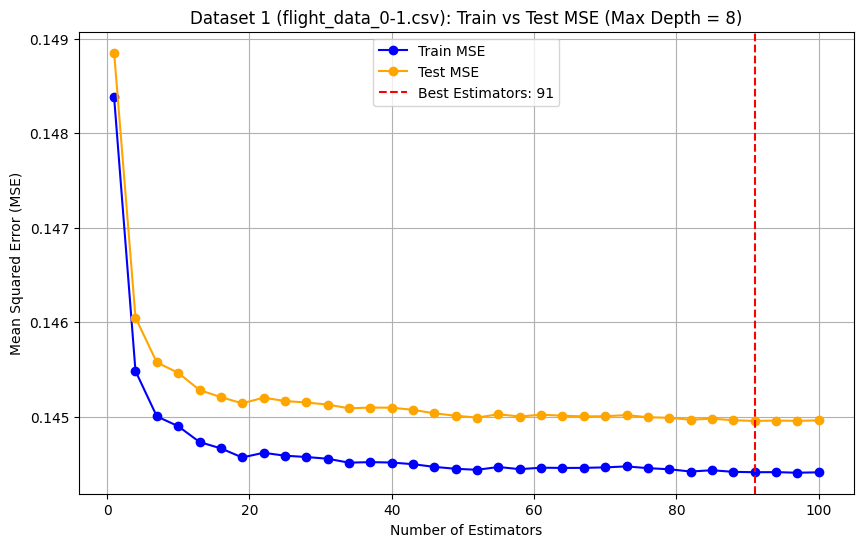

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare to store MSE values for Dataset 1
mse_train_values_01 = []
mse_test_values_01 = []
n_estimators_range = range(1, 101, 3)  # Every 3 estimators from 1 to 100

for n_estimators in n_estimators_range:
    # Train Random Forest for Dataset 1
    rf = RandomForestRegressor(random_state=42, n_estimators=n_estimators, max_depth=8, n_jobs=-1)
    rf.fit(X_train_01, y_train_01)

    # Calculate Train MSE
    y_train_pred_01 = rf.predict(X_train_01)
    mse_train_01 = mean_squared_error(y_train_01, y_train_pred_01)
    mse_train_values_01.append(mse_train_01)

    # Calculate Test MSE
    y_test_pred_01 = rf.predict(X_test_01)
    mse_test_01 = mean_squared_error(y_test_01, y_test_pred_01)
    mse_test_values_01.append(mse_test_01)

# Find the best test MSE and corresponding number of estimators
best_test_mse_01 = min(mse_test_values_01)
best_n_estimators_01 = n_estimators_range[mse_test_values_01.index(best_test_mse_01)]

# Print the best Test MSE
print(f"Best Test MSE for Dataset 1: {best_test_mse_01:.4f} (with {best_n_estimators_01} estimators)")

# Plot Train vs Test MSE for Dataset 1
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mse_train_values_01, label='Train MSE', marker='o', linestyle='-', color='blue')
plt.plot(n_estimators_range, mse_test_values_01, label='Test MSE', marker='o', linestyle='-', color='orange')
plt.axvline(x=best_n_estimators_01, color='red', linestyle='--', label=f"Best Estimators: {best_n_estimators_01}")
plt.title('Dataset 1 (flight_data_0-1.csv): Train vs Test MSE (Max Depth = 8)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid()
plt.show()

Best Test MSE for Dataset 2: 1361.7415 (with 85 estimators)


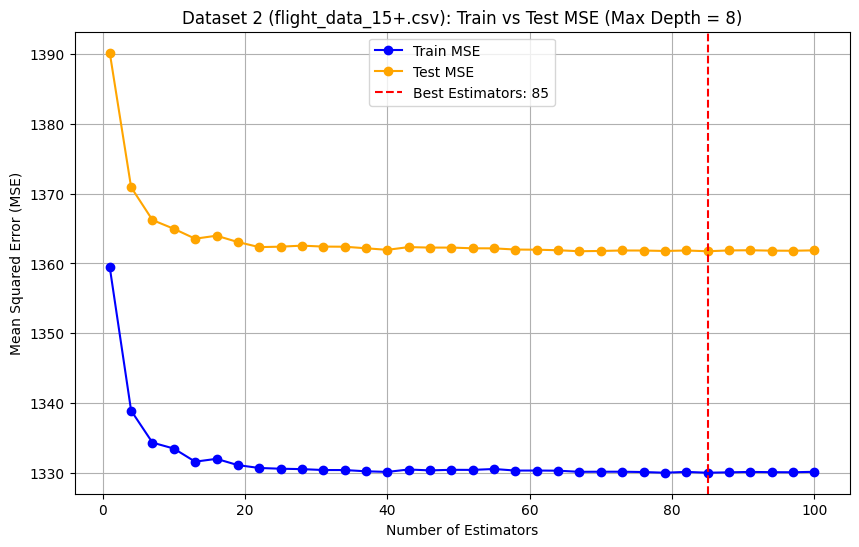

In [ ]:
# Prepare to store MSE values for Dataset 2
mse_train_values_15 = []
mse_test_values_15 = []
n_estimators_range = range(1, 101, 5)  # Every 5 estimators from 1 to 100

for n_estimators in n_estimators_range:
    # Train Random Forest for Dataset 2
    rf = RandomForestRegressor(random_state=42, n_estimators=n_estimators, max_depth=6, n_jobs=-1)
    rf.fit(X_train_15, y_train_15)

    # Calculate Train MSE
    y_train_pred_15 = rf.predict(X_train_15)
    mse_train_15 = mean_squared_error(y_train_15, y_train_pred_15)
    mse_train_values_15.append(mse_train_15)

    # Calculate Test MSE
    y_test_pred_15 = rf.predict(X_test_15)
    mse_test_15 = mean_squared_error(y_test_15, y_test_pred_15)
    mse_test_values_15.append(mse_test_15)

# Find the best test MSE and corresponding number of estimators
best_test_mse_15 = min(mse_test_values_15)
best_n_estimators_15 = n_estimators_range[mse_test_values_15.index(best_test_mse_15)]

# Print the best Test MSE
print(f"Best Test MSE for Dataset 2: {best_test_mse_15:.4f} (with {best_n_estimators_15} estimators)")

# Plot Train vs Test MSE for Dataset 2
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mse_train_values_15, label='Train MSE', marker='o', linestyle='-', color='blue')
plt.plot(n_estimators_range, mse_test_values_15, label='Test MSE', marker='o', linestyle='-', color='orange')
plt.axvline(x=best_n_estimators_15, color='red', linestyle='--', label=f"Best Estimators: {best_n_estimators_15}")
plt.title('Dataset 2 (flight_data_15+.csv): Train vs Test MSE (Max Depth = 8)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Recompute MSE for RF with optimal estimators (no tree depth restriction)

# Dataset 1: Use best number of estimators (91)
rf_best_01 = RandomForestRegressor(random_state=42, n_estimators=91, max_depth=8, n_jobs=-1)
rf_best_01.fit(X_train_01, y_train_01)
y_test_pred_01_rf = rf_best_01.predict(X_test_01)
mse_01_rf = mean_squared_error(y_test_01, y_test_pred_01_rf)
print(f"Decimal MSE for Dataset 1 (0-1 regression): {mse_01_rf:.4f}")

# Dataset 2: Use best number of estimators (85)
rf_best_15 = RandomForestRegressor(random_state=42, n_estimators=85, max_depth=8, n_jobs=-1)
rf_best_15.fit(X_train_15, y_train_15)
y_test_pred_15_rf = rf_best_15.predict(X_test_15)

# Convert predictions and test labels to 0-1 binary for Dataset 2
y_test_pred_15_binary = (y_test_pred_15_rf >= 15).astype(int)  # Predictions: 0 or 1
y_test_15_binary = (y_test_15 >= 15).astype(int)  # Ground truth: 0 or 1
mse_15_rf_binary = mean_squared_error(y_test_15_binary, y_test_pred_15_binary)
print(f"Binary MSE for Dataset 2 (15+ converted to 0-1): {mse_15_rf_binary:.4f}")

# Compare Binary MSE
if mse_01_rf < mse_15_rf_binary:
    print("Dataset 1 (0-1 regression) model is better for binary classification.")
else:
    print("Dataset 2 (15+ converted to 0-1) model is better for binary classification.")

Decimal MSE for Dataset 1 (0-1 regression): 0.1549
Binary MSE for Dataset 2 (15+ converted to 0-1): 0.3045
Dataset 1 (0-1 regression) model is better for binary classification.


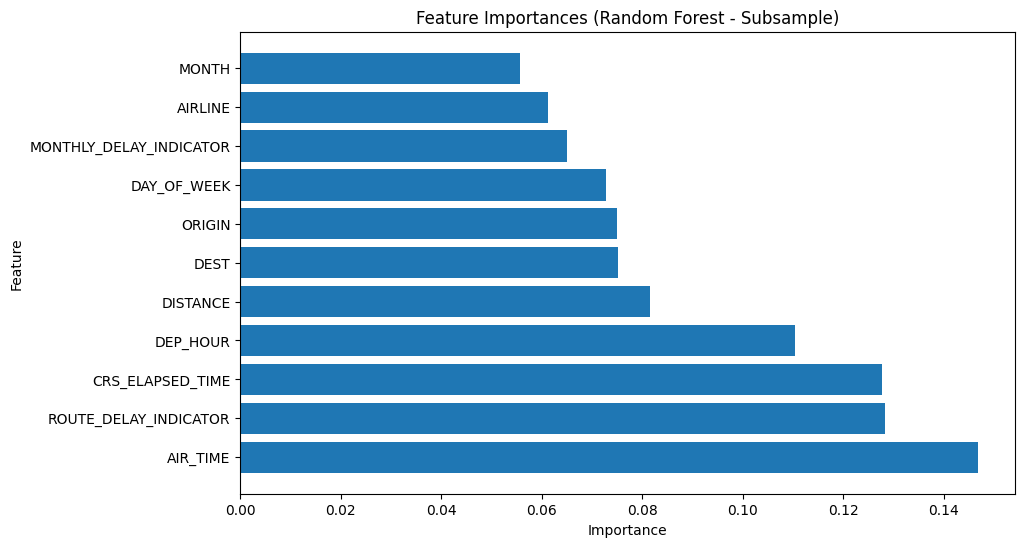

In [7]:
# prompt: now using a subsample of 10,000 on the 01 dataset, create a feature importances graph. run a new random forest on this sample with 20 estimators

# Subsample Dataset 1
df_sample = df_01.sample(n=10000, random_state=42)

# Define features (X) and target (y) for the subsample
X_sample = df_sample.drop(columns=['ARR_DELAY'])
y_sample = df_sample['ARR_DELAY']

# Apply Ordinal Encoding to the subsample
X_sample[categorical_cols] = encoder.transform(X_sample[categorical_cols])

# Split the subsample into training and testing sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

# Train a Random Forest model on the subsample with 20 estimators
rf_sample = RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1)
rf_sample.fit(X_train_sample, y_train_sample)

# Get feature importances
importances = rf_sample.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': X_sample.columns, 'importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest - Subsample)')
plt.show()